# Multi-Linear Regression

Alhough this dataset fits better to a classification problem, it is possible to use regression to solve it, by rounding the final output to a whole number, and using that result as the classification label.

In [1]:
# Import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.model_selection import train_test_split

## Data Setup

In [2]:
# Read dataset and create training an testing datasets
df = pd.read_csv('../Occupancy_Estimation.csv')
X_train, X_test = train_test_split(df, test_size=0.2)

## Multi-linear Regression without interactions
### Model Creation

In [3]:
# Make a list of all allowed features. Remove "Date", "Time" and "Room_Occupancy_Count"
possible = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
            'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

# Create initial variables for feature selection
base_formula = "Room_Occupancy_Count ~ "
fixed_features = []
adjusted_train_R_squared = []
models = []

# Set number of desired features for final model
number_of_features = 10

# For each iteration
for k in range(number_of_features):
    # Create an empty "best" variable
    best = ["", 0, "", None]
    
    # For each possible factor
    for factor in possible:
        # Calculate formula using factor
        formula = base_formula + ("" if k == 0 else "+ ") + factor

        #Create new model and fit it
        model = smf.ols(formula=formula, data=X_train).fit()

        # If model is best yet, store its data
        if(model.rsquared_adj > best[1]):
            best = [factor, model.rsquared_adj, formula, model]
    
    # Store best model's data in global variables
    fixed_features.append(best[0])
    adjusted_train_R_squared.append(best[1])
    base_formula = best[2] + " "
    models.append(best[3])

    # Removed used feature from "possible" list
    possible.remove(best[0])

# Print final model's data
print("Formula: ", base_formula)
print("Adj. R2: ", adjusted_train_R_squared[-1])

Formula:  Room_Occupancy_Count ~ S1_Light + S7_PIR + S5_CO2_Slope + S5_CO2 + S3_Temp + S4_Temp + S2_Temp + S6_PIR + S3_Light + S4_Light 
Adj. R2:  0.889794662553019


In [4]:
# Print final model's statistical summary
models[-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.890
Model:                              OLS   Adj. R-squared:                  0.890
Method:                   Least Squares   F-statistic:                     6543.
Date:                  Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                          16:38:52   Log-Likelihood:                -1742.6
No. Observations:                  8103   AIC:                             3507.
Df Residuals:                      8092   BIC:                             3584.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.4128      0.387    -16.569      0.000      -7.172      -5.654
S1_Light         0.0070      0.000     51.581      0.000       0.007       0.007
S7_PIR           0.4205      0.017     24.367      0.000       0.387       0.454
S5_CO2_Slope     0.2001      0.004     51.196      0.000       0.192       0.208
S5_CO2           0.0002   3.95e-05      4.032      0.000    8.17e-05       0.000
S3_Temp          0.8563      0.024     35.425      0.000       0.809       0.904
S4_Temp         -0.7183      0.023    -31.878      0.000      -0.762      -0.674
S2_Temp          0.1384      0.010     13.548      0.000       0.118       0.158
S6_PIR           0.1873      0.016     11.728      0.000       0.156       0.219
S3_Light         0.0017      0.000     13.143      0.000       0.001       0.002
S4_Light        -0.0032      0.000    -12.710      0.000      -0.004      -0.003
==============================================================================
Omnibus:                     4168.305   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81167.731
Skew:                           2.020   Prob(JB):                         0.00
Kurtosis:                      17.969   Cond. No.                     5.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation

In [5]:
# Create support arrays
training_errors = []
testing_errors = []
training_residuals = []
testing_residuals = []
adjusted_test_R_squared = []

# Calculate sample size and mean
N = len(X_test["Room_Occupancy_Count"])
average = np.mean(X_test["Room_Occupancy_Count"])

# Calculate the Total Sum of Squares
TSS = sum([(i-average)**2 for i in X_test["Room_Occupancy_Count"]])

# For each model
for i in range(len(models)):
    # Calculate prediction error for each model
    training_errors.append(X_train["Room_Occupancy_Count"] - models[i].predict(X_train))
    testing_errors.append(X_test["Room_Occupancy_Count"] - models[i].predict(X_test))

    # Calculate the Residuals Sum of Squares
    training_residuals.append(sum([j**2 for j in training_errors[i]]))
    testing_residuals.append(sum([j**2 for j in testing_errors[i]]))

    # Calculate Test R-Squared
    # Training R-squared is given by model and was already stored during model selection
    adjusted_test_R_squared.append(1 - (testing_residuals[i]/TSS) * (N-1)/(N-i))

# Print Adjusted R-squared and RSS values for training and testing
print("Training Adjusted R-squared", adjusted_train_R_squared)
print("Training Residuals Sum of Squares", training_residuals)
print()
print("Testing Adjusted R-squared", adjusted_test_R_squared)
print("Testing Residuals Sum of Squares", testing_residuals)


Training Adjusted R-squared [0.725410562844337, 0.7968676227718852, 0.8198333588361345, 0.86314023699895, 0.8689899609164256, 0.8835753252467132, 0.8854565330177916, 0.8868142593873822, 0.8876084258185787, 0.889794662553019]
Training Residuals Sum of Squares [1819.4106483418948, 1345.7749587970047, 1193.4770005660553, 906.4875195191026, 867.6348514380852, 770.9457274575806, 758.3949811771379, 749.3128667061135, 743.9633949254519, 729.4017079279208]

Testing Adjusted R-squared [0.6994759758155318, 0.8000334788817575, 0.8206908557737931, 0.8590167559047828, 0.8645358726581753, 0.8774359364185746, 0.8789213813204498, 0.8809891542529776, 0.8821196146600323, 0.8835983152560467]
Testing Residuals Sum of Squares [438.6160747561043, 291.7079236420974, 261.44410467686623, 205.46094902140524, 197.32011604878983, 178.44129743218124, 176.19141136819871, 173.0966918008044, 171.36756116992416, 169.1340590691767]


(0.7, 0.9)

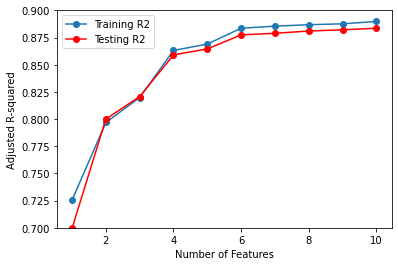

In [6]:
# Plot Adjusted R-squared values for training and testing datasets
predictors = range(1, number_of_features+1)
fig, ax = plt.subplots()
ax.plot(predictors, adjusted_train_R_squared, "o-", label="Training R2")
ax.plot(predictors, adjusted_test_R_squared, "o-", label="Testing R2", color="red")
ax.legend(loc="best")

ax.set_xlabel('Number of Features')
ax.set_ylabel('Adjusted R-squared')
ax.set_ylim([0.70,0.90])

Text(0, 0.5, 'Residuals Sum of Squares')

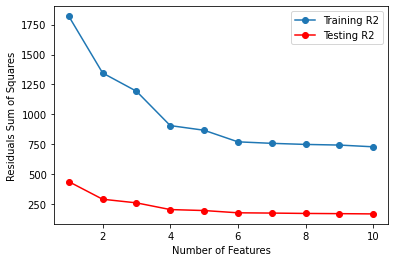

In [7]:
# Print plot for Residuals Sum of Squares
predictors = range(1, number_of_features+1)
fig, ax = plt.subplots()
ax.plot(predictors, training_residuals, "o-", label="Training R2")
ax.plot(predictors, testing_residuals, "o-", label="Testing R2", color="red")
ax.legend(loc="best")

ax.set_xlabel('Number of Features')
ax.set_ylabel('Residuals Sum of Squares')

As we can see, using the best 10 features can only gives us an R<sup>2</sup> score of 0.890. While this could be considered an acceptable accuracy, it could be improved further by using feature interactions.

## Multi-linear Regression with Interactions
### Model Creation

We can multiply all features to obtain the best possible linear model. While this method could achieve an very high Adjusted R<sup>2</sup> score, the number of features and interactions it would have would be of 120 variables. This would be a highly complex and highly inefficient model.

A better solution would be to take the best regression features and use only the interactions between them.

In [8]:
# Create regression model with the interactions of the best 5 features
formula = "Room_Occupancy_Count ~ S1_Light * S7_PIR * S5_CO2_Slope * S5_CO2 * S3_Temp"
interaction_model = smf.ols(formula=formula, data=X_train).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.932
Model:                              OLS   Adj. R-squared:                  0.931
Method:                   Least Squares   F-statistic:                     3547.
Date:                  Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                          16:38:52   Log-Likelihood:                 185.66
No. Observations:                  8103   AIC:                            -307.3
Df Residuals:                      8071   BIC:                            -83.33
Df Model:                            31                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -15.0779      1.444    -10.440      0.000     -17.909     -12.247
S1_Light                                        0.0447      0.020      2.251      0.024       0.006       0.084
S7_PIR                                        -40.5305     17.905     -2.264      0.024     -75.628      -5.433
S1_Light:S7_PIR                                 0.4459      0.133      3.352      0.001       0.185       0.707
S5_CO2_Slope                                  -27.8764      1.344    -20.748      0.000     -30.510     -25.243
S1_Light:S5_CO2_Slope                           0.1680      0.017      9.971      0.000       0.135       0.201
S7_PIR:S5_CO2_Slope                            51.1840     10.166      5.035      0.000      31.256      71.112
S1_Light:S7_PIR:S5_CO2_Slope                   -0.4509      0.074     -6.103      0.000      -0.596      -0.306
S5_CO2                                          0.0311      0.004      7.628      0.000       0.023       0.039
S1_Light:S5_CO2                             -6.974e-05   4.57e-05     -1.526      0.127      -0.000    1.98e-05
S7_PIR:S5_CO2                                  -0.1410      0.027     -5.159      0.000      -0.195      -0.087
S1_Light:S7_PIR:S5_CO2                          0.0008      0.000      4.125      0.000       0.000       0.001
S5_CO2_Slope:S5_CO2                             0.0204      0.002      8.886      0.000       0.016       0.025
S1_Light:S5_CO2_Slope:S5_CO2                   -0.0001   2.59e-05     -4.822      0.000      -0.000   -7.42e-05
S7_PIR:S5_CO2_Slope:S5_CO2                     -0.0510      0.014     -3.627      0.000      -0.079      -0.023
S1_Light:S7_PIR:S5_CO2_Slope:S5_CO2             0.0005    9.7e-05      4.661      0.000       0.000       0.001
S3_Temp                                         0.5876      0.056     10.484      0.000       0.478       0.697
S1_Light:S3_Temp                               -0.0016      0.001     -2.128      0.033      -0.003      -0.000
S7_PIR:S3_Temp                                  1.8528      0.701      2.643      0.008       0.479       3.227
S1_Light:S7_PIR:S3_Temp                        -0.0192      0.005     -3.679      0.000      -0.029      -0.009
S5_CO2_Slope:S3_Temp                            1.1181      0.053     21.257      0.000       1.015       1.221
S1_Light:S5_CO2_Slope:S3_Temp                  -0.0067      0.001    -10.218      0.000      -0.008      -0.005
S7_PIR:S5_CO2_Slope:S3_Temp                    -2.0466      0.398     -5.142      0.000      -2.827      -1.266
S1_Light:S7_PIR:S5_CO2_Slope:S3_Temp            0.0180      0.003      6.202      0.000       0.012       0.024
S5_CO2:S3_Temp                       

This has an improvement in accuracy when compared to not using interactions, but has too many features due to interactions. Simplifying the model to only use two-way interactions may provide a more efficient model, at the cost of a small loss in accuraccy.

In [9]:
# Create a new model with only two-way interactions at most

formula =  "Room_Occupancy_Count ~ "
formula += "S1_Light * S7_PIR + "
formula += "S1_Light * S5_CO2_Slope + "
formula += "S1_Light * S5_CO2 + "
formula += "S1_Light * S3_Temp + "

formula += "S7_PIR * S5_CO2_Slope + "
formula += "S7_PIR * S5_CO2 + "
formula += "S7_PIR * S3_Temp + "

formula += "S5_CO2_Slope * S5_CO2 + "
formula += "S5_CO2_Slope * S3_Temp + "
formula += "S5_CO2 * S3_Temp"

reduced_interaction_model = smf.ols(formula=formula, data=X_train).fit()
reduced_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.921
Model:                              OLS   Adj. R-squared:                  0.921
Method:                   Least Squares   F-statistic:                     6270.
Date:                  Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                          16:38:53   Log-Likelihood:                -408.28
No. Observations:                  8103   AIC:                             848.6
Df Residuals:                      8087   BIC:                             960.6
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -13.2633      0.847    -15.668      0.000     -14.923     -11.604
S1_Light                  0.1050      0.009     11.743      0.000       0.087       0.123
S7_PIR                    1.5355      1.961      0.783      0.434      -2.308       5.379
S1_Light:S7_PIR          -0.0102      0.000    -36.243      0.000      -0.011      -0.010
S5_CO2_Slope            -11.9333      0.471    -25.346      0.000     -12.856     -11.010
S1_Light:S5_CO2_Slope    -0.0007   5.69e-05    -12.866      0.000      -0.001      -0.001
S5_CO2                    0.0228      0.002     10.080      0.000       0.018       0.027
S1_Light:S5_CO2         2.14e-05   6.05e-07     35.402      0.000    2.02e-05    2.26e-05
S3_Temp                   0.5218      0.033     15.742      0.000       0.457       0.587
S1_Light:S3_Temp         -0.0042      0.000    -11.660      0.000      -0.005      -0.004
S7_PIR:S5_CO2_Slope       0.0617      0.009      6.756      0.000       0.044       0.080
S7_PIR:S5_CO2            -0.0010      0.000     -9.497      0.000      -0.001      -0.001
S7_PIR:S3_Temp            0.0324      0.078      0.413      0.680      -0.121       0.186
S5_CO2_Slope:S5_CO2      -0.0006   2.37e-05    -25.482      0.000      -0.001      -0.001
S5_CO2_Slope:S3_Temp      0.4901      0.019     25.960      0.000       0.453       0.527
S5_CO2:S3_Temp           -0.0009   8.76e-05    -10.066      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     6636.532   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           481778.454
Skew:                           3.442   Prob(JB):                         0.00
Kurtosis:                      40.142   Cond. No.                     3.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Calculate prediction errors for 5-Way Interaction Model
interaction_training_error = X_train["Room_Occupancy_Count"] - interaction_model.predict(X_train)
interaction_testing_errors = X_test["Room_Occupancy_Count"] - interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares for 5-Way Interaction Model
interaction_training_residuals = sum([j**2 for j in interaction_training_error])
interaction_testing_residuals = sum([j**2 for j in interaction_testing_errors])

# Calculate Test R-Squared for 5-Way Interaction Model
# Training R-squared is given by model and was already stored during model selection
interaction_adjusted_test_R_squared = (1 - (interaction_testing_residuals/TSS) * (N-1)/(N-31))

# Print results for 5-Way Interaction Model
print("5-Way Interaction Model")
print("Training Adjusted R-squared", interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", interaction_training_residuals)
print("Testing Residuals Sum of Squares", interaction_testing_residuals)
print()

# Calculate prediction errors for 2-Way Interaction Model
reduced_interaction_training_error = X_train["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_train)
reduced_interaction_testing_errors = X_test["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares for 2-Way Interaction Model
reduced_interaction_training_residuals = sum([j**2 for j in reduced_interaction_training_error])
reduced_interaction_testing_residuals = sum([j**2 for j in reduced_interaction_testing_errors])

# Calculate Test R-Squared for 2-Way Interaction Model
# Training R-squared is given by model and was already stored during model selection
reduced_interaction_adjusted_test_R_squared = (1 - (reduced_interaction_testing_residuals/TSS) * (N-1)/(N-31))

# Print results for 2-Way Interaction Model
print("2-Way Interaction Model")
print("Training Adjusted R-squared", reduced_interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", reduced_interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", reduced_interaction_training_residuals)
print("Testing Residuals Sum of Squares", reduced_interaction_testing_residuals)

5-Way Interaction Model
Training Adjusted R-squared 0.9313510348021516
Testing Adjusted R-squared 0.927551620490202
Training Residuals Sum of Squares 453.17883178750844
Testing Residuals Sum of Squares 104.12079685475177

2-Way Interaction Model
Training Adjusted R-squared 0.9206694616290023
Testing Adjusted R-squared 0.9208299436701147
Training Residuals Sum of Squares 524.7302698061703
Testing Residuals Sum of Squares 113.78100390759477


## Results

Using a Multi-Linear Regression both with and without interactons results in a moslty accurate model that can predict the correct number of people in the room around 90% of the time. This is a good result, but the accuracy may improve if a pure classification method is used to solve this problem